In [4]:
# leg5@nyu.edu
# apply MDS to shepard tones

# modules
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import MDS
import glob
from scipy.io.wavfile import read

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import SpectralEmbedding

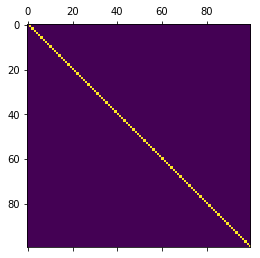

/anaconda/lib/python2.7/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


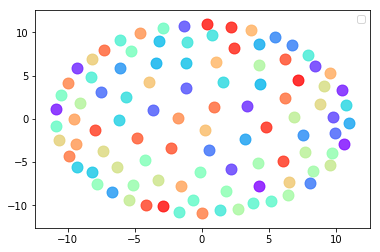

In [5]:
# first, let's generate data, with 100 dimensions, where each dimension only contains one non-zero element
# we see that this doesn't generate the right space in MDS
n_points = 100
circular_data = np.identity(n_points)

# scale
circular_data = StandardScaler().fit_transform(circular_data)

# plot original
plt.matshow(circular_data)
plt.show()

# fit MDS
trans_data = MDS().fit_transform(circular_data)

# plot
cols = plt.cm.rainbow_r(np.linspace(0, 1, n_points))
for dim in range(n_points):
    plt.scatter(trans_data[dim, 0], trans_data[dim, 1], c=cols[dim], s=120, alpha=0.8)
plt.legend()
plt.show()

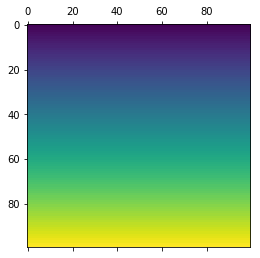

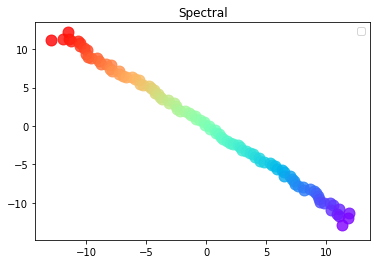

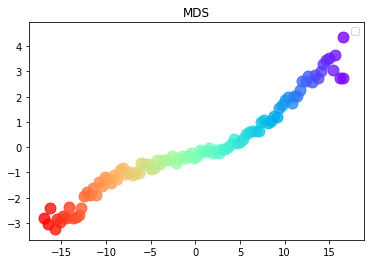

In [6]:
# second, let's make the difference an amplitude difference
# that worked!! 
n_points = 100
circular_data = (np.ones([n_points, n_points]) * np.linspace(0, 1, n_points)).T

# scale
circular_data = StandardScaler().fit_transform(circular_data)

# plot original
plt.matshow(circular_data)
plt.show()

# fit MDS
trans_data = MDS().fit_transform(circular_data)

# plot
cols = plt.cm.rainbow_r(np.linspace(0, 1, n_points))
for dim in range(n_points):
    plt.scatter(trans_data[dim, 0], trans_data[dim, 1], c=cols[dim], s=120, alpha=0.8)
plt.title('Spectral')
plt.legend()
plt.show()

# fit MDS
trans_data = MDS().fit_transform(circular_data)

# plot
cols = plt.cm.rainbow_r(np.linspace(0, 1, n_points))
for dim in range(n_points):
    plt.scatter(trans_data[dim, 0], trans_data[dim, 1], c=cols[dim], s=120, alpha=0.8)
plt.title('MDS')
plt.legend()
plt.show()

12


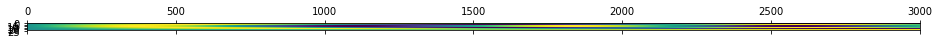

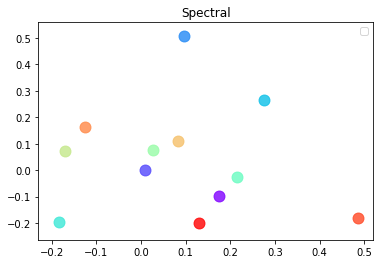

In [26]:
# now ... let's do this with a stack of sinusoids...

def make_sinusoid(f, n_points):
    Fs = 8000
    x = np.arange(n_points)
    y = np.sin(2 * np.pi * f * x / Fs)
    return y


n_times = 3000
for n_points in [12]:
    
    print(n_points)

    reference = np.concatenate([np.linspace(0, n_points/2., n_points), np.linspace(0, n_points/2., n_points)[::-1]])
    circular_data = np.array([make_sinusoid(f, n_times) for f in reference])

    # scale
#     circular_data = StandardScaler().fit_transform(circular_data.T).T

    # plot original
    plt.matshow(circular_data)
    plt.show()

    # fit MDS
    trans_data = SpectralEmbedding().fit_transform(circular_data)

    # plot
    cols = plt.cm.rainbow_r(np.linspace(0, 1, n_points))
    for dim in range(n_points):
        plt.scatter(trans_data[dim, 0], trans_data[dim, 1], c=cols[dim], s=120, alpha=0.8)
    plt.title('Spectral')
    plt.legend()
    plt.show()

#     # fit MDS
#     trans_data = MDS().fit_transform(circular_data)

#     # plot
#     cols = plt.cm.rainbow_r(np.linspace(0, 1, n_points))
#     for dim in range(n_points):
#         plt.scatter(trans_data[dim, 0], trans_data[dim, 1], c=cols[dim], s=120, alpha=0.8)
#     plt.title('MDS')
#     plt.legend()
#     plt.show()
    
# OK, so the spectral embedding stays stable with increasing data points, but the MDS
# gets whacky with too many. and scaling the input is also important

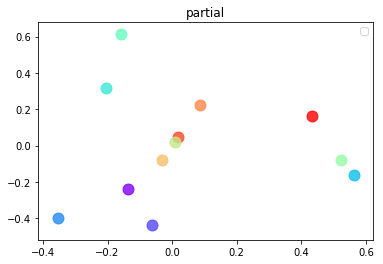

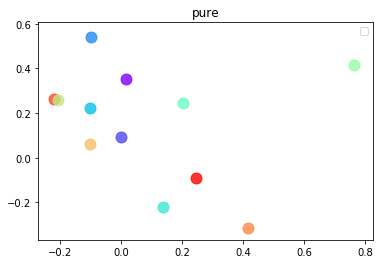

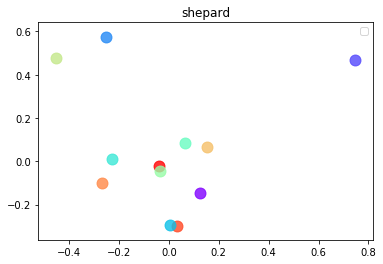

In [28]:
# now let's try on the actual wav files

# paths
base_dir = '/Users/lauragwilliams/Documents/experiments/shepard/shepard/'
tone_dir = '%s/stimuli/main_exp/db_normed_tones' % (base_dir)
out_dir = '%s/plots' % (base_dir)

# params
conditions = ['partial', 'pure', 'shepard']
key = 'A'
cols = [plt.cm.Blues(np.linspace(0.2, 1, 12)),
        plt.cm.Oranges(np.linspace(0.2, 1, 12)),
        plt.cm.Greens(np.linspace(0.2, 1, 12))]

for cond in conditions:
    
    # load data
    ffts = list()
    freqs = list()
    tcs = list()
    
    # init
    cond_fft = list()
    cond_freq = list()
    cond_tc = list()

    # get all files for this condition and key
    search_term = '%s/%s-%s_*-min-60_max-20.wav' % (tone_dir, cond, key)
    fnames = glob.glob(search_term)

    # load data in turn
    for fii, fname in enumerate(fnames):
        fs, t = read(fname)

        # add the freq of this tone to the list
        tone_freq = fname.split('%s_' % (key))[1].split('-min')[0]
        if tone_freq == '440':
            continue
        cond_freq.append(tone_freq)

        # get fft
        fft_data = np.abs(np.fft.fft(t))[0:1000]
        cond_fft.append(fft_data)
        cond_tc.append(t)

    # add to total list
    ffts.append(np.array(cond_fft))
    freqs.append(np.array(cond_freq))
    tcs.append(np.array(cond_tc))

    freqs = np.array(freqs)
    ffts = np.array(ffts).astype(float)
    tcs = np.array(tcs)

    # plot
    tcs = np.squeeze(tcs)[:, 0:10000]
    n_conds = tcs.shape[0]

#     circular_data = StandardScaler().fit_transform(tcs)
    circular_data = tcs

    # fit MDS
    trans_data = SpectralEmbedding().fit_transform(circular_data)

    # plot
    cols = plt.cm.rainbow_r(np.linspace(0, 1, n_conds))
    for dim in range(n_conds):
        plt.scatter(trans_data[dim, 0], trans_data[dim, 1], c=cols[dim], s=120, alpha=0.8)
    plt.title(cond)
    plt.legend()
    plt.show()